In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-12-10 06:42:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-10 06:42:57--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  70.5MB/s    in 0.3s    

2024-12-10 06:43:00 (70

詞頻統計 (Global):
ask: 2
can: 2
country: 4
do: 2
for: 2
in: 1
in，live: 1
live: 1
love: 2
not: 1
the: 2
what: 2
you: 4
your: 2

文件向量（Bag of Words）:
文件 1: [('ask', 0), ('can', 0), ('country', 2), ('do', 0), ('for', 0), ('in', 1), ('in，live', 1), ('live', 1), ('love', 2), ('not', 0), ('the', 2), ('what', 0), ('you', 2), ('your', 0)]
文件 2: [('ask', 1), ('can', 1), ('country', 1), ('do', 1), ('for', 1), ('in', 0), ('in，live', 0), ('live', 0), ('love', 0), ('not', 1), ('the', 0), ('what', 1), ('you', 1), ('your', 1)]
文件 3: [('ask', 1), ('can', 1), ('country', 1), ('do', 1), ('for', 1), ('in', 0), ('in，live', 0), ('live', 0), ('love', 0), ('not', 0), ('the', 0), ('what', 1), ('you', 1), ('your', 1)]


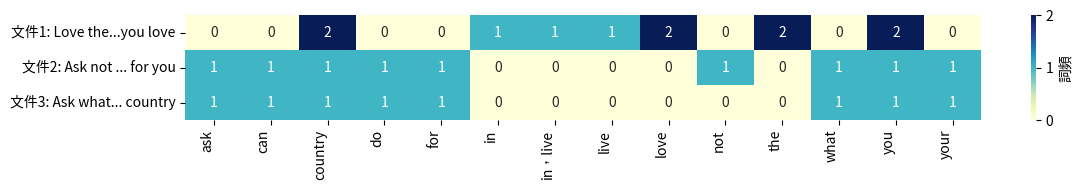

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# 文件集合
docs = [
    "Love the country you live in，live in the country you love",
    "Ask not what your country can do for you",
    "Ask what you can do for your country"
]

def truncate_text(index, text, max_length=20):
    """
    截斷長文本，超過指定長度的句子中間以...表示
    """
    label = f"文件{index + 1}: "  # 文檔截斷並加上標籤
    if len(text) <= max_length:
        return f"{label}{text}"

    # 計算前後保留字數
    half_length = (max_length - 3) // 2
    return f"{label}{text[:half_length]}...{text[-half_length:]}"

# 製作用於顯示的截斷文件標籤
display_docs = [truncate_text(idx, doc) for idx, doc in enumerate(docs)]

# 預處理：將文件拆分成詞列表
def tokenize(document):
    return document.lower().split()

# 計算全局詞頻（Bag of Words）
def calculate_global_word_counts(documents):
    word_counts = defaultdict(int)
    for doc in documents:
        tokens = tokenize(doc)
        for token in tokens:
            word_counts[token] += 1
    return word_counts

# 重新設計創建 Bag of Words 矩陣的函數
def create_bow_matrix(docs):
    # 先計算全局詞頻
    word_counts = calculate_global_word_counts(docs)
    unique_words = sorted(list(word_counts.keys()))

    # 創建詞頻矩陣
    bow_matrix = []
    for doc in docs:
        tokens = tokenize(doc)
        # 為當前文件建立向量
        row = [tokens.count(word) for word in unique_words]
        bow_matrix.append(row)

    return bow_matrix, unique_words

# 創建 Bag of Words 矩陣
bow_matrix, unique_words = create_bow_matrix(docs)

# 輸出計算結果
print("詞頻統計 (Global):")
global_word_counts = calculate_global_word_counts(docs)
for word, count in sorted(global_word_counts.items()):
    print(f"{word}: {count}")

# 輸出文件向量
print("\n文件向量（Bag of Words）:")
for idx, vector in enumerate(bow_matrix):
    print(f"文件 {idx + 1}: {list(zip(unique_words, vector))}")

# 輸出詞頻熱圖
plt.figure(figsize=(12, 2))
sns.heatmap(bow_matrix,
            xticklabels=unique_words,
            yticklabels=display_docs,
            cmap='YlGnBu',
            annot=True,  # 顯示數值
            fmt='d',  # 顯示整數格式
            cbar_kws={'label': '詞頻'})

#plt.title('Bag of Words 詞頻熱圖', fontsize=14)
#plt.xlabel('詞彙', fontsize=12)
#plt.ylabel('文件', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()